In [24]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams
%matplotlib inline

In [26]:
data = pd.io.excel.read_excel("/Users/archanaraghu/Desktop/Final Report/CO emmision.xls")

In [27]:
data.count()

CO         24
Traffic    24
Wind       24
Hour       24
dtype: int64

In [28]:
print(data.keys())

Index(['CO', 'Traffic', 'Wind', 'Hour'], dtype='object')


In [29]:
data.describe()

,CO,Traffic,Wind,Hour
count,24.000000,24.000000,24.000000,24.000000
mean,4.537500,159.333333,1.995833,12.500000
std,2.120872,98.030460,2.319760,7.071068
min,1.200000,10.000000,-0.200000,1.000000
25%,2.925000,77.750000,0.000000,6.750000
50%,5.250000,178.500000,0.800000,12.500000
75%,6.450000,247.500000,4.000000,18.250000
max,7.400000,308.000000,5.900000,24.000000


In [30]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
CO         24 non-null float64
Traffic    24 non-null int64
Wind       24 non-null float64
Hour       24 non-null int64
dtypes: float64(2), int64(2)
memory usage: 848.0 bytes


In [32]:
data.isnull().values.any()

False

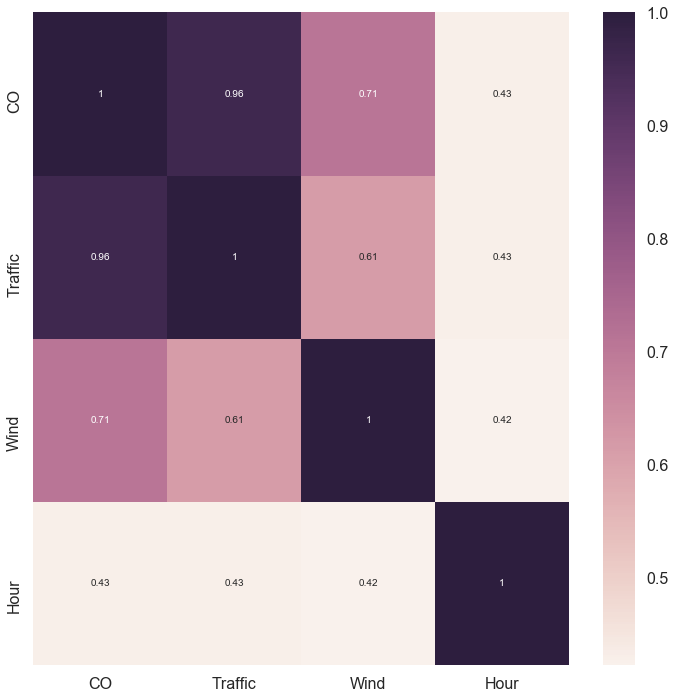

In [48]:
import seaborn as sns
corr= data.corr()
sns.heatmap(corr, annot = True)
fig = plt.gcf()
fig.set_size_inches(12,12)

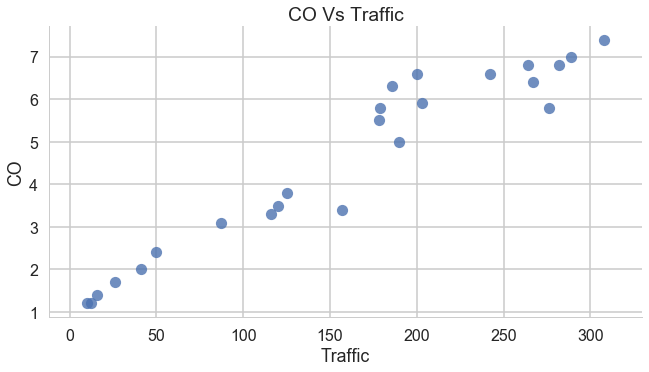

In [49]:
sns.lmplot(x="Traffic",y="CO", data=data, fit_reg=None)

sns.plt.title("CO Vs Traffic")
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()

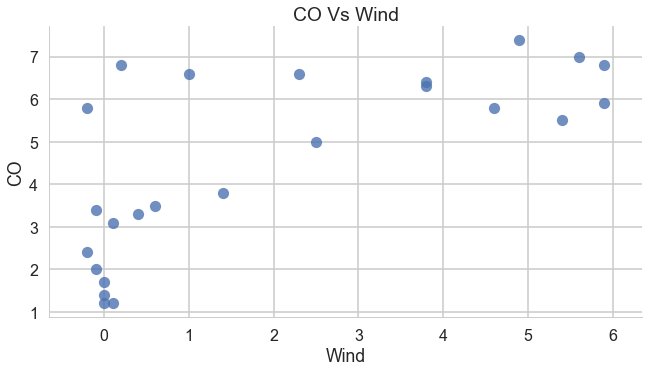

In [50]:
sns.lmplot(x="Wind",y="CO", data=data, fit_reg=None)

sns.plt.title("CO Vs Wind")
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()

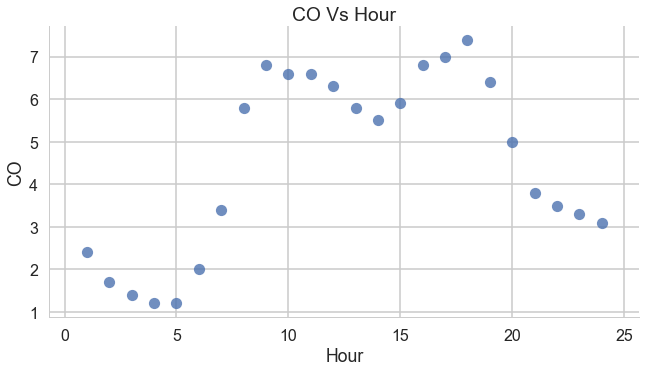

In [51]:
sns.lmplot(x="Hour",y="CO", data=data, fit_reg=None)

sns.plt.title("CO Vs Hour")
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()

In [44]:
X = data.drop('CO', axis = 1)
Y = data['CO']

In [45]:
## Trainset and Testing Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16, 3)
(8, 3)
(16,)
(8,)


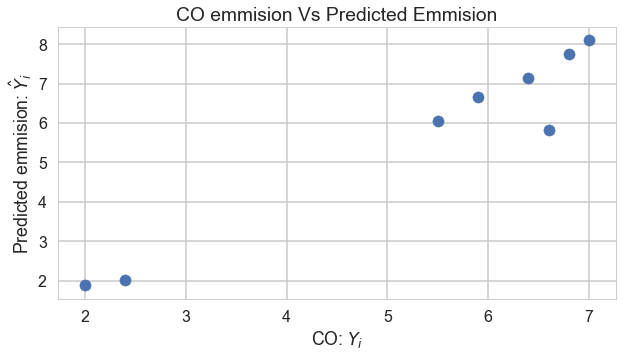

In [54]:
# Linear Regression 
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("CO: $Y_i$")
plt.ylabel("Predicted emmision: $\hat{Y}_i$")
plt.title("CO vs Predicted emmision: $Y_i$ vs $\hat{Y}_i$")

sns.plt.title("CO emmision Vs Predicted Emmision")
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()

In [55]:
## Mean Square Error
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

0.533051193411
